In [54]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15', #limit of the items you want to show
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '7860253c-a5d4-404d-842b-33dd325269f0',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-07-29T01:19:04.862Z', 'error_code': 0, 'error_message': None, 'elapsed': 30, 'credit_count': 1, 'notice': None, 'total_count': 9934}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10377, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [55]:
type(data)

dict

In [56]:
import pandas as pd 
pd.set_option('display.max_columns',None)
df = pd.json_normalize(data['data'])

In [57]:
#Automate this process 
#first thing to do is to add a time stamp on the column at the end 
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10377,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.944181e+07,1.944181e+07,False,NaN,1,NaN,NaN,None,2023-07-29T01:17:00.000Z,29339.683304,1.103433e+10,2.6358,0.075597,0.235383,-2.052332,-2.630466,5.697040,0.600307,5.704166e+11,48.1329,6.161333e+11,None,2023-07-29T01:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-29 02:19:09.398523
1,1027,Ethereum,ETH,ethereum,7191,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.208440e+08,1.208440e+08,True,NaN,2,NaN,NaN,None,2023-07-29T01:17:00.000Z,1874.719421,3.761823e+09,-10.0491,-0.009533,0.698998,-1.104135,2.025346,-1.180566,-1.380785,2.265485e+11,19.1165,2.265485e+11,None,2023-07-29T01:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-29 02:19:09.398523
2,825,Tether USDt,USDT,tether,58005,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.382469e+10,8.670626e+10,True,NaN,3,NaN,NaN,None,2023-07-29T01:17:00.000Z,1.000128,1.714748e+10,-3.9743,0.005853,0.032410,0.007411,0.011741,-0.008776,-0.026975,8.383543e+10,7.0741,8.671737e+10,None,2023-07-29T01:17:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-29 02:19:09.398523
3,52,XRP,XRP,xrp,1014,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.269385e+10,9.998856e+10,False,NaN,4,NaN,NaN,None,2023-07-29T01:17:00.000Z,0.711074,1.032953e+09,-29.6168,-0.149016,-0.625939,-7.472038,53.470234,44.296851,49.415889,3.746923e+10,3.1617,7.110741e+10,None,2023-07-29T01:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-29 02:19:09.398523
4,1839,BNB,BNB,bnb,1545,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538557e+08,1.538557e+08,False,NaN,5,NaN,NaN,None,2023-07-29T01:17:00.000Z,242.318359,3.836941e+08,-11.9907,0.094848,0.552764,-0.922663,4.283118,-22.329136,-24.588390,3.728206e+10,3.1459,3.728206e+10,None,2023-07-29T01:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-29 02:19:09.398523
5,3408,USD Coin,USDC,usd-coin,13470,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.655016e+10,2.655016e+10,False,NaN,6,NaN,NaN,None,2023-07-29T01:17:00.000Z,1.000199,2.543245e+09,3.7820,0.010534,0.023171,0.023965,0.017208,0.026152,0.033593,2.655545e+10,2.2408,2.655545e+10,None,2023-07-29T01:17:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-29 02:19:09.398523
6,2010,Cardano,ADA,cardano,883,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.500735e+10,3.601472e+10,False,NaN,7,NaN,NaN,None,2023-07-29T01:17:00.000Z,0.310752,1.415149e+08,-16.7929,0.173056,0.239908,-1.085455,15.816509,-18.104555,-22.478353,1.087861e+10,0.9180,1.398384e+10,None,2023-07-29T01:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-29 02:19:09.398523
7,74,Dogecoin,DOGE,dogecoin,757,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.403646e+11,1.403646e+11,True,NaN,8,NaN,NaN,None,2023-07-29T01:17:00.000Z,0.077383,3.687871e+08,-23.3489,0.166751,-0.229519,6.621624,23.213051,5.815186,-4.552120,1.086177e+10,0.9165,1.086177e+10,None,2023-07-29T01:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-29 02:19:09.398523
8,5426,Solana,SOL,solana,494,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.042

In [64]:
#second is to make a function 
def api_auto_runner():

  global df
  url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
  parameters = {
    'start':'1',
    'limit':'15', #limit of the items you want to show
    'convert':'USD'
  }
  headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '7860253c-a5d4-404d-842b-33dd325269f0',
  }

  session = Session()
  session.headers.update(headers)

  try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    print(data)
  except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

#append the data into the df
  pd.set_option('display.max_columns',None)
  df2 = pd.json_normalize(data['data'])
  df2['timestamp'] = pd.to_datetime('now')
  df_append = pd.DataFrame(df2)
  df = pd.concat([df,df_append])

In [65]:

import os
from time import time
from time import sleep

for i in range(333): #for API which has only 333 run per day
    api_auto_runner()
    print('API Running completed')
    sleep(60) #sleep for 1 minute 
exit()



{'status': {'timestamp': '2023-07-29T01:29:41.641Z', 'error_code': 0, 'error_message': None, 'elapsed': 35, 'credit_count': 1, 'notice': None, 'total_count': 9934}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10377, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [67]:
pd.set_option('display.float_format',lambda x: '%.5f'% x) #5 decimal point for values that has float in it.
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10377,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19441812.00000,19441812.00000,False,NaN,1,NaN,NaN,None,2023-07-29T01:17:00.000Z,29339.68330,11034330085.67034,2.63580,0.07560,0.23538,-2.05233,-2.63047,5.69704,0.60031,570416606929.73181,48.13290,616133349377.32996,None,2023-07-29T01:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-29 02:19:09.398523
1,1027,Ethereum,ETH,ethereum,7191,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120843952.94450,120843952.94450,True,NaN,2,NaN,NaN,None,2023-07-29T01:17:00.000Z,1874.71942,3761823023.35519,-10.04910,-0.00953,0.69900,-1.10414,2.02535,-1.18057,-1.38079,226548505473.23050,19.11650,226548505473.23001,None,2023-07-29T01:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-29 02:19:09.398523
2,825,Tether USDt,USDT,tether,58005,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83824685312.34805,86706257841.39186,True,NaN,3,NaN,NaN,None,2023-07-29T01:17:00.000Z,1.00013,17147476073.23515,-3.97430,0.00585,0.03241,0.00741,0.01174,-0.00878,-0.02698,83835432352.54848,7.07410,86717374323.78999,None,2023-07-29T01:17:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-29 02:19:09.398523
3,52,XRP,XRP,xrp,1014,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,52693851493.00000,99988556423.00000,False,NaN,4,NaN,NaN,None,2023-07-29T01:17:00.000Z,0.71107,1032953419.75699,-29.61680,-0.14902,-0.62594,-7.47204,53.47023,44.29685,49.41589,37469230392.38087,3.16170,71107405002.19000,None,2023-07-29T01:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-29 02:19:09.398523
4,1839,BNB,BNB,bnb,1545,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153855694.14958,153855694.14958,False,NaN,5,NaN,NaN,None,2023-07-29T01:17:00.000Z,242.31836,383694130.79893,-11.99070,0.09485,0.55276,-0.92266,4.28312,-22.32914,-24.58839,37282059279.90253,3.14590,37282059279.90000,None,2023-07-29T01:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-29 02:19:09.398523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,2,Litecoin,LTC,litecoin,961,2013-04-28T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange]",84000000.00000,73463214.22744,84000000.00000,False,NaN,11,NaN,NaN,None,2023-07-29T01:32:00.000Z,91.40997,336593807.79695,-11.40580,-0.13054,0.59585,-4.32458,9.29036,0.36434,0.88039,6715270433.64452,0.56680,7678437737.28000,None,2023-07-29T01:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-29 02:33:42.679284
11,3890,Polygon,MATIC,polygon,787,2019-04-28T00:00:00.000Z,"[pos, platform, enterprise-solutions, zero-kno...",10000000000.00000,9319469069.28493,10000000000.00000,False,NaN,12,NaN,NaN,None,2023-07-29T01:32:00.000Z,0.71103,215998161.47468,-9.39180,0.11254,-1.15766,-7.94050,15.03354,-21.61020,-28.81892,6626437047.94211,0.55940,7110316047.70000,None,2023-07-29T01:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-29 02:33:42.679284
12,6636,Polkadot,DOT,polkadot-new,543,2020-08-19T00:00:00.000Z,"[substrate, polkadot, binance-chain, polkadot-...",NaN,1209621762.51127,1339100639.81645,True,NaN,13,NaN,NaN,None,2023-07-29T01:32:00.000Z,5.22352,93653131.85446,-4.91990,-0.04461,-0.12722,-4.65169,5

In [68]:
#group by to see the data in visualisation
df3=df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.03068,0.21791,-2.06400,-2.83934,5.63969,0.59356
Ethereum,-0.08137,0.66264,-1.11821,1.89212,-1.24012,-1.39308
Tether USDt,-0.00015,0.02813,-0.01035,0.00827,-0.01736,-0.04646
XRP,-0.15019,-0.67366,-7.55416,53.09645,44.32637,49.41519
BNB,0.03688,0.52764,-0.94170,4.14333,-22.37518,-24.59400
USD Coin,0.00388,0.01866,0.00704,0.01116,0.02227,0.02038
Cardano,0.13435,0.25482,-1.02766,15.45525,-18.15418,-22.48722
Dogecoin,0.09338,-0.23020,6.54231,22.98795,5.75743,-4.53392
Solana,0.10617,-1.19220,-3.35904,54.73766,20.56712,7.58273


In [72]:
#stack the data to move the percentage to a row
df4 = df3.stack()
pd.DataFrame(df4)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
df4

name                                         
Bitcoin          quote.USD.percent_change_1h      0.03068
                 quote.USD.percent_change_24h     0.21791
                 quote.USD.percent_change_7d     -2.06400
                 quote.USD.percent_change_30d    -2.83934
                 quote.USD.percent_change_60d     5.63969
                 quote.USD.percent_change_90d     0.59356
Ethereum         quote.USD.percent_change_1h     -0.08137
                 quote.USD.percent_change_24h     0.66264
                 quote.USD.percent_change_7d     -1.11821
                 quote.USD.percent_change_30d     1.89212
                 quote.USD.percent_change_60d    -1.24012
                 quote.USD.percent_change_90d    -1.39308
Tether USDt      quote.USD.percent_change_1h     -0.00015
                 quote.USD.percent_change_24h     0.02813
                 quote.USD.percent_change_7d     -0.01035
                 quote.USD.percent_change_30d     0.00827
                 quote.USD

In [73]:
type(df4) #type of the data is series 

pandas.core.series.Series

In [74]:
#change it to dataFrame otherwise it wont be visialise it
df5 = df4.to_frame(name='values')
df5

values
name                                                  
Bitcoin         quote.USD.percent_change_1h    0.03068
                quote.USD.percent_change_24h   0.21791
                quote.USD.percent_change_7d   -2.06400
                quote.USD.percent_change_30d  -2.83934
                quote.USD.percent_change_60d   5.63969
                quote.USD.percent_change_90d   0.59356
Ethereum        quote.USD.percent_change_1h   -0.08137
                quote.USD.percent_change_24h   0.66264
                quote.USD.percent_change_7d   -1.11821
                quote.USD.percent_change_30d   1.89212
                quote.USD.percent_change_60d  -1.24012
                quote.USD.percent_change_90d  -1.39308
Tether USDt     quote.USD.percent_change_1h   -0.00015
                quote.USD.percent_change_24h   0.02813
                quote.USD.percent_change_7d   -0.01035
                quote.USD.percent_change_30d   0.00827
                quote.USD.percent_change_60d  -0.01736
                quote.USD.percent_change_90d  -0.04646
XRP             quote.USD.percent_change_1h   -0.15019
                quote.USD.percent_change_24h  -0.67366
                quote.USD.percent_change_7d   -7.55416
                quote.USD.percent_change_30d  53.09645
                quote.USD.percent_change_60d  44.32637
                quote.USD.percent_change_90d  49.41519
BNB             quote.USD.percent_change_1h    0.03688
                quote.USD.percent_change_24h   0.52764
                quote.USD.percent_change_7d   -0.94170
                quote.USD.percent_change_30d   4.14333
                quote.USD.percent_change_60d -22.37518
                quote.USD.percent_change_90d -24.59400
USD Coin        quote.USD.percent_change_1h    0.00388
                quote.USD.percent_change_24h   0.01866
                quote.USD.percent_change_7d    0.00704
                quote.USD.percent_change_30d   0.01116
                quote.USD.percent_change_60d   0.02227
                quote.USD.percent_change_90d   0.02038
Cardano         quote.USD.percent_change_1h    0.13435
                quote.USD.percent_change_24h   0.25482
                quote.USD.percent_change_7d   -1.02766
                quote.USD.percent_change_30d  15.45525
                quote.USD.percent_change_60d -18.15418
                quote.USD.percent_change_90d -22.48722
Dogecoin        quote.USD.percent_change_1h    0.09338
                quote.USD.percent_change_24h  -0.23020
                quote.USD.percent_change_7d    6.54231
                quote.USD.percent_change_30d  22.98795
                quote.USD.percent_change_60d   5.75743
                quote.USD.percent_change_90d  -4.53392
Solana          quote.USD.percent_change_1h    0.10617
                quote.USD.percent_change_24h  -1.19220
                quote.USD.percent_change_7d   -3.35904
                quote.USD.percent_change_30d  54.73766
                quote.USD.percent_change_60d  20.56712
                quote.USD.percent_change_90d   7.58273
TRON            quote.USD.percent_change_1h    0.00955
                quote.USD.percent_change_24h   2.46816
                quote.USD.percent_change_7d    5.66823
                quote.USD.percent_change_30d  15.14740
                quote.USD.percent_change_60d  11.73100
                quote.USD.percent_change_90d  25.62712
Litecoin        quote.USD.percent_change_1h   -0.02126
                quote.USD.percent_change_24h   0.65218
                quote.USD.percent_change_7d   -4.53539
                quote.USD.percent_change_30d   9.50198
                quote.USD.percent_change_60d   0.43108
                quote.USD.percent_change_90d   0.81041
Polygon         quote.USD.percent_change_1h    0.18133
                quote.USD.percent_change_24h  -1.16533
                quote.USD.percent_change_7d   -7.96363
                quote.USD.percent_change_30d  15.23663
                quote.USD.percent_change_60d -21.54263
                quote.USD.percent

In [76]:
#give it an index 
df5.count()

values    90
dtype: int64

In [79]:
index = pd.Index(range(90)) #90 is the values count of df5.count()
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.03068
1,Bitcoin,quote.USD.percent_change_24h,0.21791
2,Bitcoin,quote.USD.percent_change_7d,-2.06400
3,Bitcoin,quote.USD.percent_change_30d,-2.83934
4,Bitcoin,quote.USD.percent_change_60d,5.63969
5,Bitcoin,quote.USD.percent_change_90d,0.59356
6,Ethereum,quote.USD.percent_change_1h,-0.08137
7,Ethereum,quote.USD.percent_change_24h,0.66264
8,Ethereum,quote.USD.percent_change_7d,-1.11821
9,Ethereum,quote.USD.percent_change_30d,1.89212


In [80]:
#rename column level_1
df7=df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.03068
1,Bitcoin,quote.USD.percent_change_24h,0.21791
2,Bitcoin,quote.USD.percent_change_7d,-2.06400
3,Bitcoin,quote.USD.percent_change_30d,-2.83934
4,Bitcoin,quote.USD.percent_change_60d,5.63969
5,Bitcoin,quote.USD.percent_change_90d,0.59356
6,Ethereum,quote.USD.percent_change_1h,-0.08137
7,Ethereum,quote.USD.percent_change_24h,0.66264
8,Ethereum,quote.USD.percent_change_7d,-1.11821
9,Ethereum,quote.USD.percent_change_30d,1.89212


In [81]:
#visualise the data
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
#change pencent_change column to get better visualisation
df7['percent_change']=df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.03068
1,Bitcoin,24h,0.21791
2,Bitcoin,7d,-2.06400
3,Bitcoin,30d,-2.83934
4,Bitcoin,60d,5.63969
5,Bitcoin,90d,0.59356
6,Ethereum,1h,-0.08137
7,Ethereum,24h,0.66264
8,Ethereum,7d,-1.11821
9,Ethereum,30d,1.89212


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


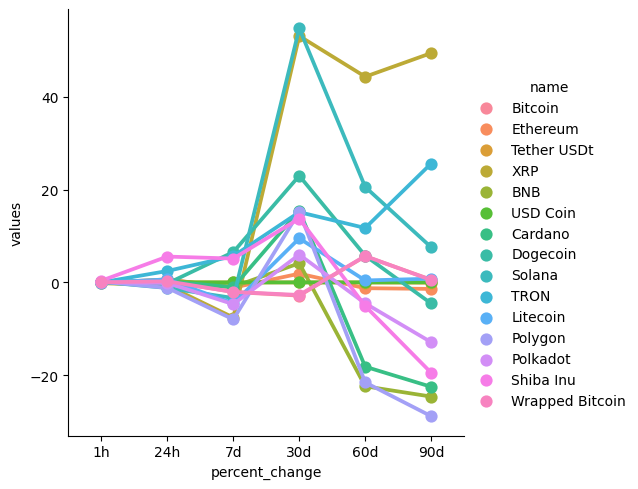

In [86]:
sns.catplot(x='percent_change',y='values',hue='name',data=df7,kind='point')

In [91]:
#another data visualisation (bitcoin only)
df8 = df[['name','quote.USD.price','timestamp']]
df8=df8.query("name=='Bitcoin'") #query for bitcoin only
df8

,name,quote.USD.price,timestamp
0,Bitcoin,29339.68330,2023-07-29 02:19:09.398523
0,Bitcoin,29339.68330,2023-07-29 02:19:21.218796
0,Bitcoin,29338.00743,2023-07-29 02:20:22.775958
0,Bitcoin,29335.45562,2023-07-29 02:21:23.028139
0,Bitcoin,29335.38770,2023-07-29 02:22:23.301732
0,Bitcoin,29335.38770,2023-07-29 02:23:23.576008
0,Bitcoin,29327.86031,2023-07-29 02:29:41.632213
0,Bitcoin,29330.98286,2023-07-29 02:30:41.912883
0,Bitcoin,29331.65861,2023-07-29 02:31:42.161286
0,Bitcoin,29330.33550,2023-07-29 02:32:42.432343


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

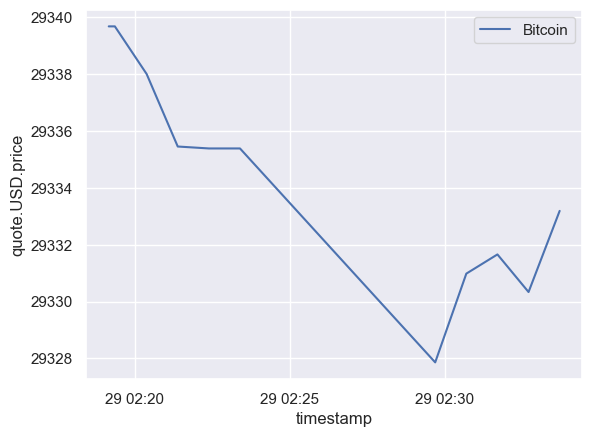

In [95]:
#visualisation
sns.set_theme(style='darkgrid')
sns.lineplot(x= 'timestamp',data=df8, y='quote.USD.price', label='Bitcoin')